**IMPORT NECCESSARY LIBRARY**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the Dataset**

In [4]:
df=pd.read_csv(r"C:\Users\fr2006tu\Downloads\Processed_Flipdata - Processed_Flipdata.csv")

In [5]:
#head
df.head()
#first five rows 

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [6]:
#tail
df.tail()
#last five rows

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"
540,642,OPPO A77,Sky Blue,128,4,5000,50MP,8MP,0,16.66,Mediatek Helio G35,"15,999"


## **Sanity Check of data**

In [8]:
#shape
df.shape
#541 are rows and 12 are columns

(541, 12)

In [9]:
#info()
df.info()
#Numerical Columns	6 (int64 and float64)
#Categorical Columns 6 (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


### **Detection of missing values**

In [11]:
#finding missing values
df.isna().sum().sort_values(ascending=False)
#no columns has missing values

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [12]:
#delete unwanted columns
df.drop(columns=["Unnamed: 0"], inplace=True)    

In [13]:
df.shape
#one column has been removed 
#541 rows 
#11 columns

(541, 11)

In [14]:
#finding duplicates
df.duplicated().sum()

10

In [15]:
df.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


### **Outliers**

In [17]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

print("Outliers Count Per Column:\n")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

 
#Outliers were detected in several numerical columns using the IQR method. 
#The dataset contains outliers primarily in the Battery_, Memory, AI Lens, and Mobile Height columns.
#Battery_ shows the highest number of outliers (152), suggesting significant variation or extreme values in battery capacity across the devices.

Outliers Count Per Column:

Battery_         152
Memory            55
AI Lens           34
Mobile Height     33
dtype: int64


### OUTLIERS HANDLING

In [18]:
# Select all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < LB, LB, df[col])
    df[col] = np.where(df[col] > UB, UB, df[col])


#Outliers in all numerical columns were capped using the IQR method,
#ensuring that extreme values do not distort the analysis while preserving all rows in the dataset.

### RECHECK FOR OUTLIERS

In [19]:
#again checking for outliers
# Select numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))

outlier_counts = outliers.sum()

print(" Outliers count per column after capping:\n")
print(outlier_counts[outlier_counts > 0].sort_values(ascending=False))

#outliers has been resolved


 Outliers count per column after capping:

Series([], dtype: int64)


## **Feature engineering**

In [21]:
# Extract numeric megapixel value from Rear Camera column
df['Rear_Camera_MP'] = df['Rear Camera'].str.extract(r'(\d+)').astype(float)
#Raw camera values are strings like "13MP". We extract the numeric megapixel value to perform numerical analysis or modeling.

In [22]:
# Extract numeric megapixel value from Front Camera column
df['Front_Camera_MP'] = df['Front Camera'].str.extract(r'(\d+)').astype(float)
#Same logic as rear camera. Numeric front camera MP can be useful for quality comparisons.

In [23]:
# Sum of rear and front camera MP
df['Total_Camera_MP'] = df['Rear_Camera_MP'] + df['Front_Camera_MP']
#Total camera MP gives a single metric for overall camera quality, useful for customer preference or price correlation.

In [24]:
# Sum of internal memory and RAM
df['Total_Memory_GB'] = df['Memory'] + df['RAM']
#Total storage (ROM + RAM) better represents the phone’s overall capacity. Customers usually think of total memory.

In [25]:
# Battery capacity per unit of mobile height
df['Battery_Height_Ratio'] = df['Battery_'] / df['Mobile Height']
#Gives an idea of battery density. Higher ratio → better battery performance relative to phone size.

In [26]:
# Ratio of rear camera MP to RAM
df['Rear_Camera_per_GB_RAM'] = df['Rear_Camera_MP'] / df['RAM']
#Balances camera quality with RAM. Useful for finding phones where the camera quality is unusually high (or low) for available RAM.

In [27]:
# Battery capacity bins
df['Battery_Category'] = pd.cut(
    df['Battery_'],
    bins=[0, 3000, 4000, float('inf')],
    labels=['Small', 'Medium', 'Large']
)
#We categorize phones by battery size which is easier to interpret and model compared to raw values.

In [28]:
# Memory size bins
df['Memory_Category'] = pd.cut(
    df['Memory'],
    bins=[0, 4, 8, float('inf')],
    labels=['Low', 'Medium', 'High']
)
#Customers and companies often segment phones by memory tiers. This also helps avoid issues with outliers.

In [29]:
df.shape
df

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize,Rear_Camera_MP,Front_Camera_MP,Total_Camera_MP,Total_Memory_GB,Battery_Height_Ratio,Rear_Camera_per_GB_RAM,Battery_Category,Memory_Category
0,Infinix SMART 7,Night Black,64.0,4.0,5000.0,13MP,5MP,0.0,16.760,Unisoc Spreadtrum SC9863A1,"7,299",13.0,5.0,18.0,68.0,298.329356,3.25,Large,High
1,Infinix SMART 7,Azure Blue,64.0,4.0,5000.0,13MP,5MP,0.0,16.760,Unisoc Spreadtrum SC9863A1,"7,299",13.0,5.0,18.0,68.0,298.329356,3.25,Large,High
2,MOTOROLA G32,Mineral Gray,128.0,8.0,5000.0,50MP,16MP,0.0,16.640,Qualcomm Snapdragon 680,"11,999",50.0,16.0,66.0,136.0,300.480769,6.25,Large,High
3,POCO C50,Royal Blue,32.0,2.0,5000.0,8MP,5MP,0.0,16.560,Mediatek Helio A22,"5,649",8.0,5.0,13.0,34.0,301.932367,4.00,Large,High
4,Infinix HOT 30i,Marigold,128.0,8.0,5000.0,50MP,5MP,0.0,16.760,G37,"8,999",50.0,5.0,55.0,136.0,298.329356,6.25,Large,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,224.0,8.0,5000.0,50MP,12MP,0.0,15.865,Qualcomm Snapdragon 8 Gen 2,"79,999",50.0,12.0,62.0,232.0,315.159155,6.25,Large,High
537,LAVA Z21,Cyan,32.0,2.0,5000.0,5MP,2MP,0.0,15.865,Octa Core,"5,998",5.0,2.0,7.0,34.0,315.159155,2.50,Large,High
538,Tecno Spark 8T,Turquoise Cyan,64.0,4.0,5000.0,50MP,8MP,0.0,16.760,MediaTek Helio G35,"9,990",50.0,8.0,58.0,68.0,298.329356,12.50,Large,High
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8.0,5000.0,50MP,32MP,0.0,16.260,"Exynos 1380, Octa Core","38,999",50.0,32.0,82.0,136.0,307.503075,6.25,Large,High


In [30]:
print(df.columns)

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize',
       'Rear_Camera_MP', 'Front_Camera_MP', 'Total_Camera_MP',
       'Total_Memory_GB', 'Battery_Height_Ratio', 'Rear_Camera_per_GB_RAM',
       'Battery_Category', 'Memory_Category'],
      dtype='object')


In [31]:
# List of columns to drop
cols_to_drop = ['Rear Camera', 'Front Camera']
# Drop them
df_final = df.drop(columns=cols_to_drop)

# Check new dataset shape
print(df_final.shape)
#2 columns have been removed
#Rear_Camera_MP and Front_Camera_MP were extracted from Rear Camera and Front Camera.
#So the original Rear Camera, Front Camera are now redundant

(541, 17)


### **Visualization**

In [33]:
#Your Prize column had values like "7,299" → this is a string with comma, which pandas sees as text, not a number.
df_final['Prize'] = pd.to_numeric(df['Prize'].astype(str).str.replace(',', ''), errors='coerce')
#now price column has numerical data


#### Correlation Heatmap

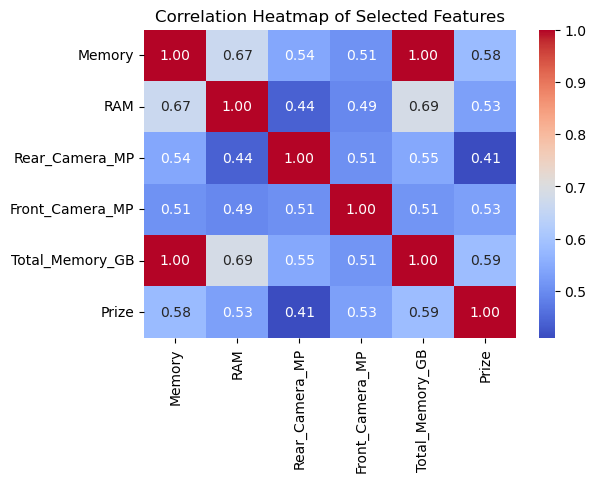

In [35]:
## 🔎 Correct Correlation Heatmap (after feature selection)

plt.figure(figsize=(6,4))
corr = df_final[['Memory', 'RAM', 'Rear_Camera_MP', 'Front_Camera_MP', 
                   'Total_Memory_GB', 'Prize']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Selected Features')
plt.show()


#Total_Memory_GB ↔ Prize (0.59) → strongest price driver.
#Memory ↔ Prize (0.58) → more storage → higher price.
#RAM ↔ Prize (0.53) → more RAM slightly increases price.
#Front_Camera_MP ↔ Prize (0.53) → better selfie camera → higher price.
#Rear_Camera_MP ↔ Prize (0.41) → rear camera less influential.
#Memory ↔ RAM (0.67) → higher memory phones often have more RAM.

#### Price vs Total Memory Scatter plot

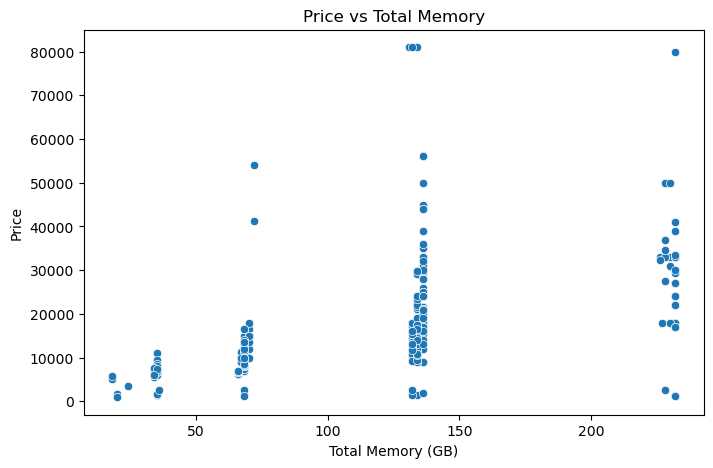

In [37]:
## 📊 Price vs Total Memory (GB)

plt.figure(figsize=(8,5))
sns.scatterplot(x='Total_Memory_GB', y='Prize', data=df_final)
plt.title('Price vs Total Memory')
plt.xlabel('Total Memory (GB)')
plt.ylabel('Price')
plt.show()


#  Insight: Higher total memory is linked to higher price.

#### Price vs RAM Scatter plot

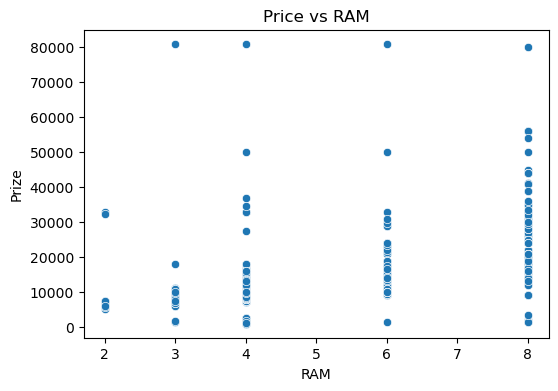

In [39]:
## 📊 Price vs RAM

plt.figure(figsize=(6,4))
sns.scatterplot(x='RAM', y='Prize', data=df_final)
plt.title('Price vs RAM')
plt.show()

# Insight: Phones with more RAM tend to be priced slightly higher.


#### Price by Model (Boxplot)

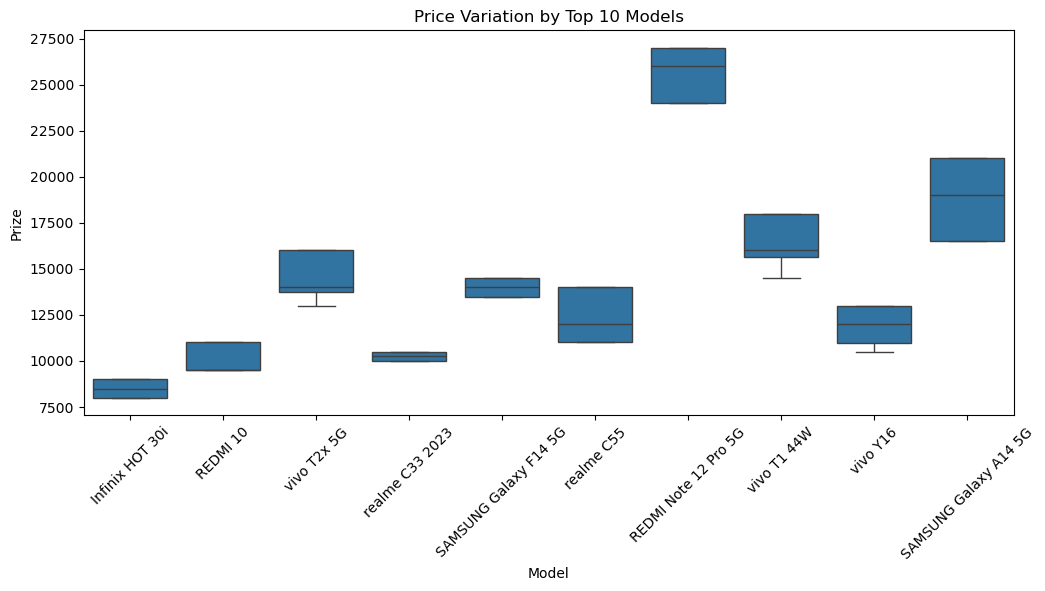

In [41]:
#displaying only the top 10 most frequent models:
top_models = df_final['Model'].value_counts().nlargest(10).index
df_top = df_final[df_final['Model'].isin(top_models)]

plt.figure(figsize=(12,5))
sns.boxplot(x='Model', y='Prize', data=df_top)
plt.title('Price Variation by Top 10 Models')
plt.xticks(rotation=45)
plt.show()


#INSIGHTS->
#REDMI Note 12 Pro 5G = highest price.
#Infinix HOT 30i, realme C33 2023 = lowest price.
#vivo, realme, SAMSUNG models = mid-range.
#Some models show wide price ranges → multiple variants.

In [75]:
df_final.shape

(541, 17)

### One-Hot Encoding of Categorical Features

In [92]:
#We use pd.get_dummies() to convert categorical variables into numeric format suitable for model training.
FullDf = pd.get_dummies(df_final, drop_first=True)

#Categorical variables (like processor, color) are converted into binary columns. This enables the model to understand categorical patterns.

### Splitting the Data

In [100]:
#We split the dataset into training and testing sets (70/30 split).
X = FullDf.drop("Prize", axis=1)
y = FullDf["Prize"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2410)

#This ensures we can evaluate how well the model generalizes to unseen data.


### Model Building - Random Forest Regressor

In [103]:
#We use a Random Forest Regressor, a robust ensemble method, suitable for non-linear problems and feature-rich datasets.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

#Random Forest doesn't require feature scaling and handles both numeric and encoded features well. It also provides feature importance analysis.

### Model Evaluation

In [106]:
#We evaluate the model using MAE, RMSE, and R² Score.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


#The model explains 67.5% of the variation in mobile prices, with an average error of ₹2.5k.
#This is a solid result for a first model and shows that the model captures most pricing patterns.

MAE: 2492.2596134969326
RMSE: 5590.612759716985
R² Score: 0.6749253558205739


### Prediction Sample Comparison

In [109]:
#We print predicted vs actual prices for the first few test samples.
print("Predicted Prices:", y_pred_rf[:5])
print("Actual Prices:   ", y_test[:5].values)

#Predicted prices closely align with actual prices, indicating reliable model behavior.

Predicted Prices: [17738.67 20489.   10639.41  6820.06  6321.37]
Actual Prices:    [18999 17999 12499  6499  6199]


### Visualize Predictions vs Actual

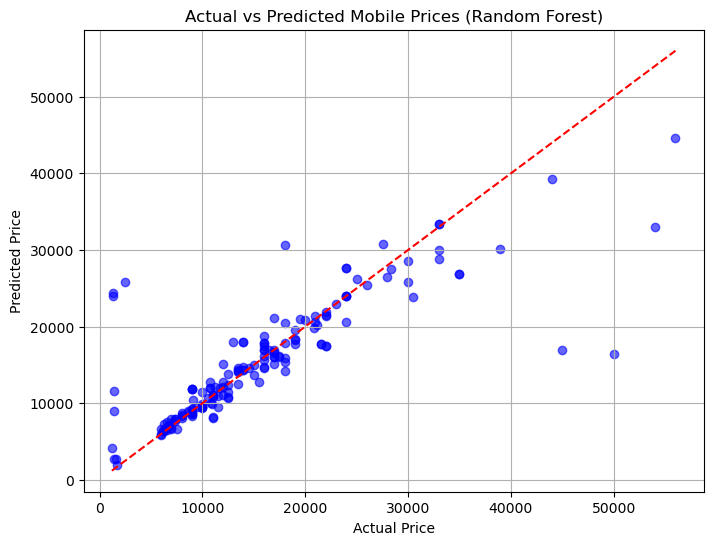

In [114]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Mobile Prices (Random Forest)")
plt.grid(True)
plt.show()


#insights->
#Most points lie close to the red line → good prediction accuracy
#Predictions are most accurate in the ₹5,000–₹25,000 range
#A few high-price predictions deviate more →possible model underfitting for expensive phones

### Feature Importance

In [83]:
# We extract and plot the most influential features used by the model.
importances = rf.feature_importances_
features = X.columns  
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Top 15 important features
top_features = feature_importance_df.head(15)

# Display
print(top_features)


                                    Feature  Importance
8                           Total_Memory_GB    0.331660
12               Model_APPLE iPhone 14 Plus    0.182089
6                           Front_Camera_MP    0.124347
7                           Total_Camera_MP    0.038345
9                      Battery_Height_Ratio    0.033564
4                             Mobile Height    0.029917
0                                    Memory    0.022116
559  Processor__Qualcomm Snapdragon 8 Gen 2    0.019552
10                   Rear_Camera_per_GB_RAM    0.013262
486             Processor__Google Tensor G2    0.011740
128             Model_SAMSUNG Galaxy S23 5G    0.011452
245                            Colour_Cream    0.011131
14                     Model_Google Pixel 7    0.010300
340                         Colour_Midnight    0.009750
1                                       RAM    0.009160


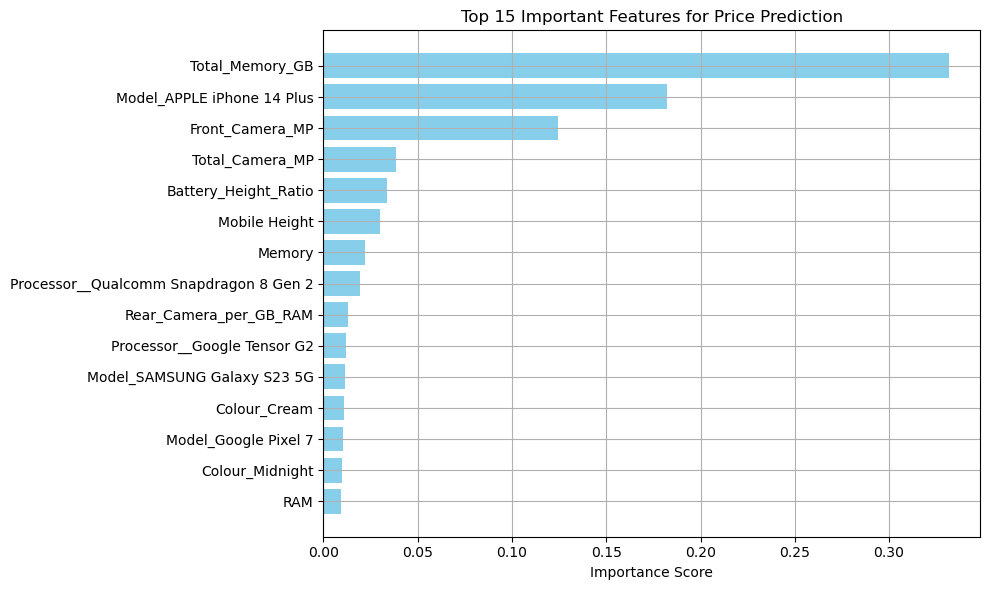

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest on top
plt.xlabel('Importance Score')
plt.title('Top 15 Important Features for Price Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()


#insights->
#Total_Memory_GB is the most powerful predictor of mobile price (~33%).
#Being an Apple iPhone 14 Plus significantly increases price — brand influence matters.
#Camera specs (Front & Total Camera MP) play a major role in pricing decisions.
#Battery height ratio and mobile height (design dimensions) also influence price.
#Surprisingly, RAM and color have low impact individually.
